# Ruta Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-8f76933c4aa8>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', 'drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dis

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-8f76933c4aa8>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', 'drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dis

# Importación de librerías


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2, ResNet50, ResNet101, ResNet152, VGG16, InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import keras
import itertools
import time

# Rutas

### Jaime

In [4]:
train_labels = pd.read_csv('/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/labels.csv')

In [5]:
# Agregar extensión ".jpg" a las IDs de las imágenes
train_labels['id'] = train_labels['id'].apply(lambda x: x + ".jpg")

In [6]:

# Rutas de los directorios de entrenamiento y prueba
train_path = '/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/train'
test_path = '/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/test'

# Elección de Razas

### By Number of breeds

10 razas




In [ ]:
# Lista de 10 razas de perros a considerar
breeds = ['golden_retriever', 'scottish_deerhound', 'doberman', 'malamute','chihuahua', 'pug', 'saint_bernard', 'beagle', 'french_bulldog',
          'tibetan_mastiff']

20 razas

In [ ]:
# Lista de 20 razas de perros a considerar
breeds = ['golden_retriever', 'scottish_deerhound', 'doberman', 'malamute','chihuahua', 'pug', 'saint_bernard', 'beagle', 'french_bulldog',
          'tibetan_mastiff', 'dingo', 'pekinese', 'bluetick', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog',
          'walker_hound', 'maltese_dog']

40 razas

In [7]:
# Lista de 40 razas de perros con más imágenes

breeds = [
    'scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher', 'bernese_mountain_dog',
    'shih-tzu', 'great_pyrenees', 'pomeranian', 'basenji', 'samoyed', 'airedale',
    'tibetan_terrier', 'leonberg', 'cairn', 'beagle', 'japanese_spaniel', 'australian_terrier',
    'blenheim_spaniel', 'miniature_pinscher', 'irish_wolfhound', 'lakeland_terrier', 'saluki',
    'papillon', 'norwegian_elkhound', 'whippet', 'siberian_husky', 'pug', 'chow',
    'italian_greyhound', 'pembroke', 'ibizan_hound', 'border_terrier', 'newfoundland',
    'lhasa', 'silky_terrier', 'dandie_dinmont', 'bedlington_terrier', 'sealyham_terrier',
    'irish_setter', 'rhodesian_ridgeback'
]



### By size of breeds (10 breeds)

Small Breeds

In [ ]:
breeds= ['chihuahua', 'pug', 'yorkshire_terrier', 'papillon', 'pekinese',
            'miniature_poodle', 'miniature_pinscher', 'norfolk_terrier',
            'toy_terrier', 'maltese_dog']

Intermediate-Small Breeds

In [ ]:
breeds = ['beagle', 'french_bulldog', 'shih-tzu', 'cairn', 'norwich_terrier',
            'eskimo_dog', 'lhasa', 'scotch_terrier', 'west_highland_white_terrier', 'basenji']


Intermediate-Big Breeds

In [ ]:
breeds = ['golden_retriever', 'border_collie', 'english_springer', 'flat-coated_retriever',
            'rhodesian_ridgeback', 'shetland_sheepdog', 'vizsla', 'brittany_spaniel',
            'whippet', 'weimaraner']

Big Breeds

In [ ]:
breeds = ['saint_bernard', 'great_dane', 'malamute', 'tibetan_mastiff',
            'doberman', 'rottweiler', 'scottish_deerhound', 'great_pyrenees',
            'newfoundland', 'bernese_mountain_dog']

### Clean the rest of the breeds

In [8]:
# Eliminar razas que no están en la lista de razas definidas
train_labels = train_labels[train_labels['breed'].isin(breeds)]


### Canitdad de razas por cada perro

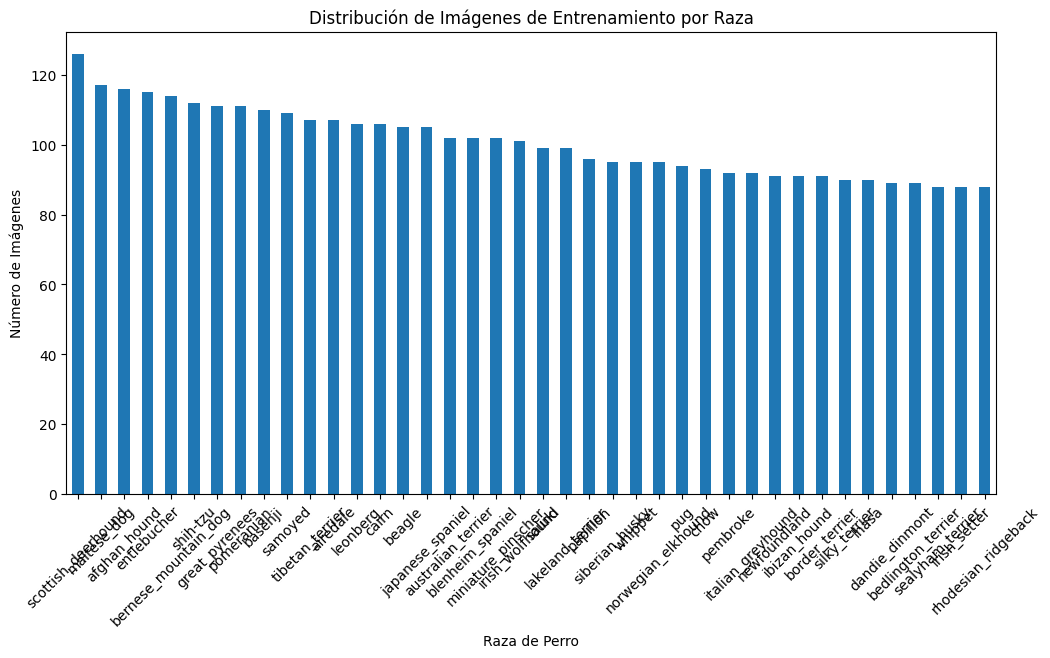

In [ ]:
# Contar la cantidad de imágenes por raza
breed_counts = train_labels['breed'].value_counts()

# Graficar la distribución de las imágenes por raza
plt.figure(figsize=(12, 6))
breed_counts.plot(kind='bar')
plt.xlabel('Raza de Perro')
plt.ylabel('Número de Imágenes')
plt.title('Distribución de Imágenes de Entrenamiento por Raza')
plt.xticks(rotation=45)
plt.show()



# Carga y preprocesado de imágenes

In [9]:
# Función para cargar y preprocesar imágenes
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for path in image_paths:
        # Cargar la imagen y redimensionarla al tamaño objetivo
        image = load_img(path, target_size=target_size)
        # Convertir la imagen a un array numpy y normalizar los valores de píxeles
        image = img_to_array(image) / 255.0
        images.append(image)
    return np.array(images)


In [10]:
# Cargar imágenes de entrenamiento y validación
train_image_paths = [os.path.join(train_path, filename) for filename in train_labels['id']]
validate_image_paths = train_image_paths[:int(len(train_image_paths) * 0.2)]  # Tomar un 20% para validación
train_image_paths = train_image_paths[int(len(train_image_paths) * 0.2):]  # Resto para entrenamiento
train_images = load_and_preprocess_images(train_image_paths)
validate_images = load_and_preprocess_images(validate_image_paths)

In [11]:
# Cargar etiquetas de entrenamiento y validación
train_labels = keras.utils.to_categorical(train_labels['breed'].map({breed: i for i, breed in enumerate(breeds)}))
validate_labels = train_labels[:len(validate_images)]
train_labels = train_labels[len(validate_images):]

# Arquitecturas de red neuronal

## Classic CNN

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(breeds), activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, validation_data=(validate_images, validate_labels), epochs=10, batch_size=32)

loss, accuracy = model.evaluate(validate_images, validate_labels)
print(f"Loss: {loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step - accuracy: 0.1323 - loss: 2.3404 - val_accuracy: 0.1667 - val_loss: 2.2766
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.1867 - loss: 2.2397 - val_accuracy: 0.2321 - val_loss: 2.1643
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3222 - loss: 2.0565 - val_accuracy: 0.2083 - val_loss: 2.1348
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3005 - loss: 1.9486 - val_accuracy: 0.2024 - val_loss: 2.3161
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3955 - loss: 1.7085 - val_accuracy: 0.2500 - val_loss: 2.1339
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5080 - loss: 1.4759 - val_accuracy: 0.2500 - val_loss: 2.2018
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5947 - loss: 1.1563 - val_accuracy: 0.2500 - val_loss: 2.4504
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6870 - loss: 0.9814 - val_accuracy: 0.2083 -

## VGG16

In [ ]:
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False


# Agregar capas adicionales al modelo
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dropout(0.3)(x)
predictor = keras.layers.Dense(len(breeds), activation='softmax')(x)

# Combinar el modelo base con las capas adicionales
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Resnet152

In [ ]:
base_model = ResNet152(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False


# Agregar capas adicionales al modelo
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dropout(0.3)(x)
predictor = keras.layers.Dense(len(breeds), activation='softmax')(x)

# Combinar el modelo base con las capas adicionales
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## Resnet101

In [ ]:
base_model = ResNet101(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False


# Agregar capas adicionales al modelo
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dropout(0.3)(x)
predictor = keras.layers.Dense(len(breeds), activation='softmax')(x)

# Combinar el modelo base con las capas adicionales
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## Resnet50

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False


# Agregar capas adicionales al modelo
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dropout(0.3)(x)
predictor = keras.layers.Dense(len(breeds), activation='softmax')(x)

# Combinar el modelo base con las capas adicionales
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## MobileNetV2

In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Congelar todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False


# Agregar capas adicionales al modelo
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dropout(0.4)(x)
predictor = keras.layers.Dense(len(breeds), activation='softmax')(x)

# Combinar el modelo base con las capas adicionales
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,885,194 (11.01 MB)

 Trainable params: 627,210 (2.39 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

# Entrenamiento

In [ ]:
  # Entrenar el modelo
  history = model.fit(train_images, train_labels, validation_data=(validate_images, validate_labels), epochs=4, batch_size=128)


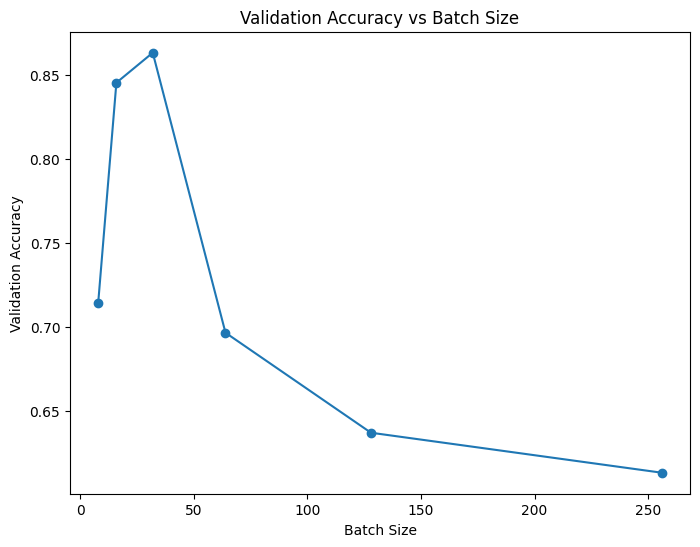

In [ ]:
# Configuración de batch sizes y valores fijos para learning rate y número de neuronas
batch_sizes = [8, 16, 32, 64, 128, 256]
learning_rate = 0.0004
num_neurons = 8

# Lista para almacenar los resultados
batch_size_results = []

# Entrenamiento del modelo para cada batch size
for bs in batch_sizes:
    # Modelo base
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    # Agregar capas adicionales
    x = layers.Flatten()(base_model.output)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(num_neurons, activation='relu')(x)
    predictor = layers.Dense(len(breeds), activation='softmax')(x)

    # Compilar y entrenar el modelo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo y almacenar precisión de validación
    history = model.fit(train_images, train_labels, validation_data=(validate_images, validate_labels), epochs=8, batch_size=bs, verbose=0)
    batch_size_results.append(history.history['val_accuracy'][-1])

# Gráfica de precisión vs batch size
plt.figure(figsize=(8, 6))
plt.plot(batch_sizes, batch_size_results, marker='o')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Batch Size')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

# Combinaciones específicas de hyperparámetros
combinations = [
    {'learning_rate': 0.0005, 'dropout': 0.2, 'batch_size': 32},
    {'learning_rate': 0.5, 'dropout': 0.4, 'batch_size': 64},
    {'learning_rate': 0.0002, 'dropout': 0.4, 'batch_size': 64},
    {'learning_rate': 0.0002, 'dropout': 0.4, 'batch_size': 128},
    {'learning_rate': 0.005, 'dropout': 0.4, 'batch_size': 64},
    {'learning_rate': 0.01, 'dropout': 0.4, 'batch_size': 128},
    {'learning_rate': 0.2, 'dropout': 0.4, 'batch_size': 64},
    {'learning_rate': 0.0001, 'dropout': 0.2, 'batch_size': 64},
    {'learning_rate': 0.0001, 'dropout': 0.4, 'batch_size': 32},
    {'learning_rate': 0.0005, 'dropout': 0.0, 'batch_size': 16},
]

# Lista para almacenar los resultados
results = []

for config in combinations:
    # Configuración de hyperparámetros
    learning_rate = config['learning_rate']
    dropout = config['dropout']
    batch_size = config['batch_size']

    # Crear modelo base CNN personalizado
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(len(breeds), activation='softmax')
    ])

    # Compilar modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(
        train_images,
        train_labels,
        validation_data=(validate_images, validate_labels),
        epochs=8,
        batch_size=batch_size,
        verbose=0
    )

    # Guardar resultados
    val_accuracy = history.history['val_accuracy'][-1]
    train_accuracy = history.history['accuracy'][-1]
    val_loss = history.history['val_loss'][-1]
    train_loss = history.history['loss'][-1]

    results.append({
        'learning_rate': learning_rate,
        'dropout': dropout,
        'batch_size': batch_size,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'train_loss': train_loss,
        'val_loss': val_loss,
    })



# Gráficas y Medidas

Top 1: Época 4, val_accuracy = 0.9444
Top 2: Época 5, val_accuracy = 0.9444
Top 3: Época 6, val_accuracy = 0.9444
Top 4: Época 7, val_accuracy = 0.9444
Top 5: Época 8, val_accuracy = 0.9444


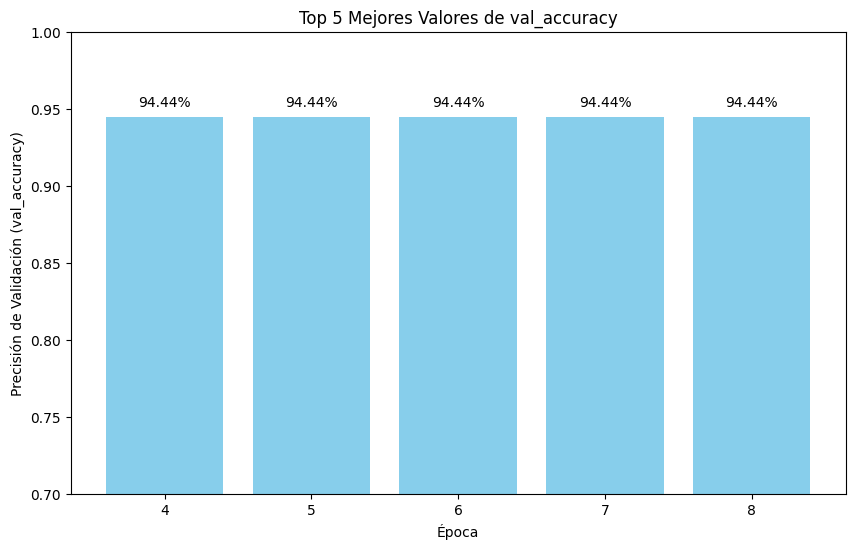

In [ ]:
# Obtener las métricas de precisión de validación
val_accuracy = history.history['val_accuracy']

# Encontrar los índices de las 5 mejores métricas de precisión de validación
top_5_indices = np.argsort(val_accuracy)[-5:]

# Obtener las métricas correspondientes a los 5 mejores valores y las épocas correspondientes
top_5_val_accuracy = [val_accuracy[i] for i in top_5_indices]
top_5_epochs = [i + 1 for i in top_5_indices]  # Sumar 1 porque las épocas suelen comenzar desde 1

# Imprimir los 5 mejores valores de val_accuracy y sus épocas correspondientes
for i, (val_acc, epoch) in enumerate(zip(top_5_val_accuracy, top_5_epochs), 1):
    print(f"Top {i}: Época {epoch}, val_accuracy = {val_acc:.4f}")

# Crear un gráfico de barras para los 5 mejores valores
plt.figure(figsize=(10, 6))
plt.bar(top_5_epochs, top_5_val_accuracy, color='skyblue')

plt.xlabel('Época')
plt.ylabel('Precisión de Validación (val_accuracy)')
plt.title('Top 5 Mejores Valores de val_accuracy')
plt.xticks(top_5_epochs)
plt.ylim(0.7, 1)

# Agregar el porcentaje encima de cada barra
for epoch, val_acc in zip(top_5_epochs, top_5_val_accuracy):
    plt.text(epoch, val_acc + 0.005, f'{val_acc*100:.2f}%', ha='center', va='bottom')

plt.show()

## Gráficas Accuracy & Loss

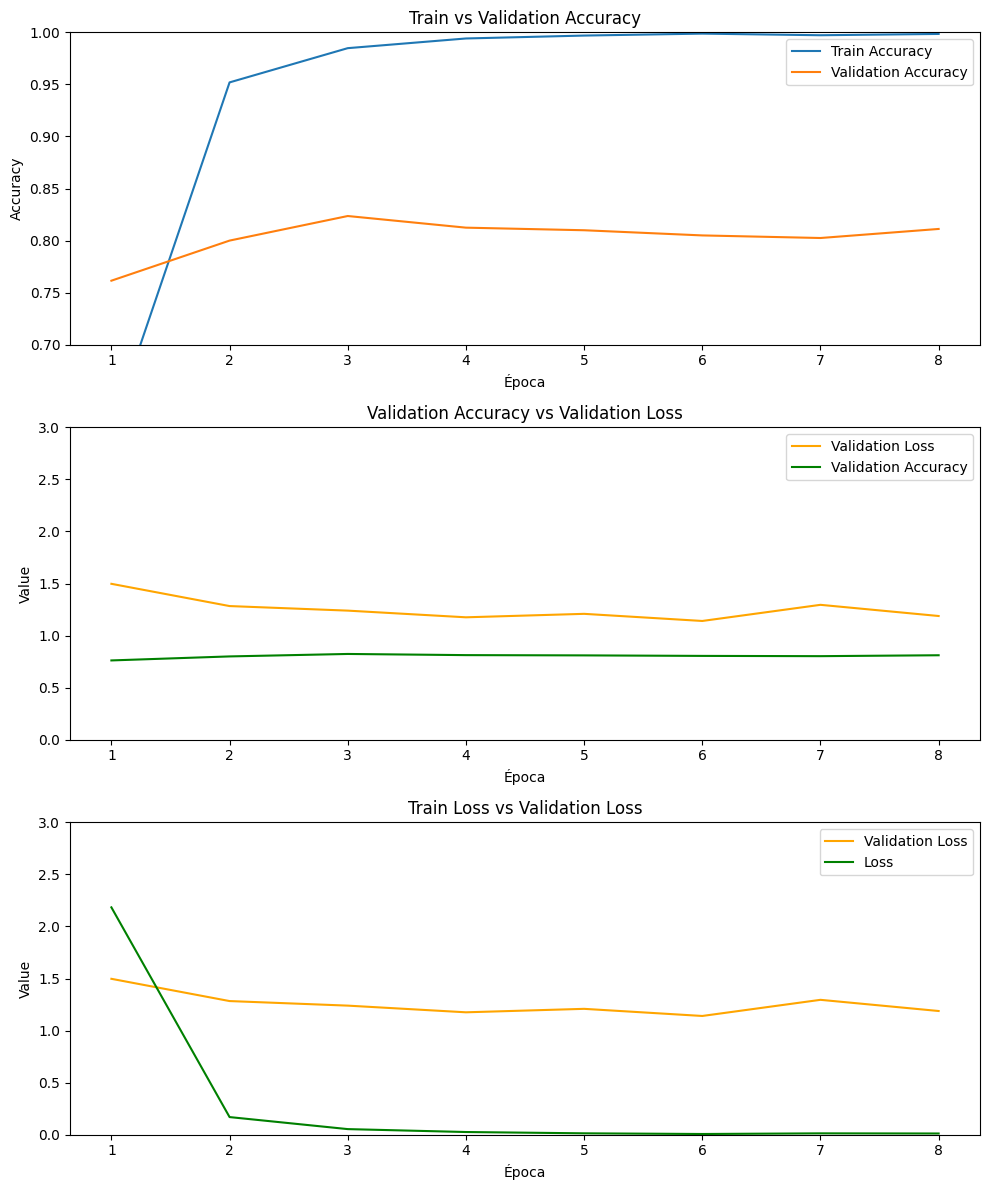

In [ ]:
# Obtener las métricas directamente del diccionario history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear una figura con subgráficos para comparar las métricas
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Primer gráfico: val_accuracy vs accuracy
axs[0].plot(range(1, len(accuracy) + 1), accuracy, label='Train Accuracy')
axs[0].plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Train vs Validation Accuracy')
axs[0].legend()
axs[0].set_ylim(0.7, 1)

# Segundo gráfico: val_loss vs val_accuracy
axs[1].plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
axs[1].plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy', color='green')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('Value')
axs[1].set_title('Validation Accuracy vs Validation Loss')
axs[1].legend()
axs[1].set_ylim(0, 3)

# Tercer gráfico: val_loss vs train loss
axs[2].plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
axs[2].plot(range(1, len(loss) + 1), loss, label='Loss', color='green')
axs[2].set_xlabel('Época')
axs[2].set_ylabel('Value')
axs[2].set_title('Train Loss vs Validation Loss')
axs[2].legend()
axs[2].set_ylim(0, 3)

# Ajustar el espaciado de la figura
plt.tight_layout()
plt.show()


## Visualización de activaciones de una capa intermedia

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 9,784,506 (37.32 MB)

 Trainable params: 2,508,840 (9.57 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 5,017,682 (19.14 MB)

In [ ]:
# Seleccionar una imagen de prueba
test_image_paths = [os.path.join(test_path, filename) for filename in os.listdir(test_path)]

# Usamos una imagen cualquiera de prueba
img_path = test_image_paths[28]

# Cargar y mostrar la imagen original
img = load_img(img_path, target_size=(224, 224))

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title("Imagen Original")
plt.axis('off')
plt.show()

# Preprocesar la imagen de prueba
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalizar la imagen

# Mostrar la imagen preprocesada
plt.figure(figsize=(6, 6))
plt.imshow(img_array[0])
plt.title("Imagen Preprocesada")
plt.axis('off')
plt.show()


### **First Layer**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


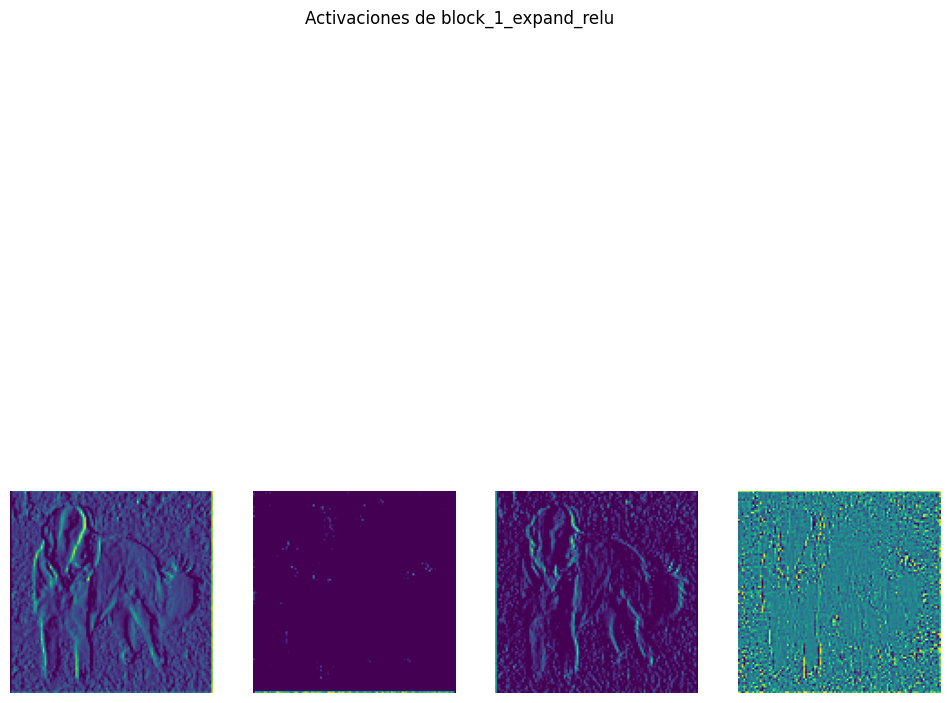

In [ ]:
layer_name = 'block_1_expand_relu'
intermediate_layer_model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)


# Obtener las activaciones
intermediate_output = intermediate_layer_model.predict(img_array)

# Visualizar las activaciones
plt.figure(figsize=(12, 12))
for i in range(min(4, intermediate_output.shape[-1])):
    plt.subplot(1, 4, i + 1)
    plt.imshow(intermediate_output[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle(f'Activaciones de {layer_name}')
plt.show()

### **Middle Layer**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


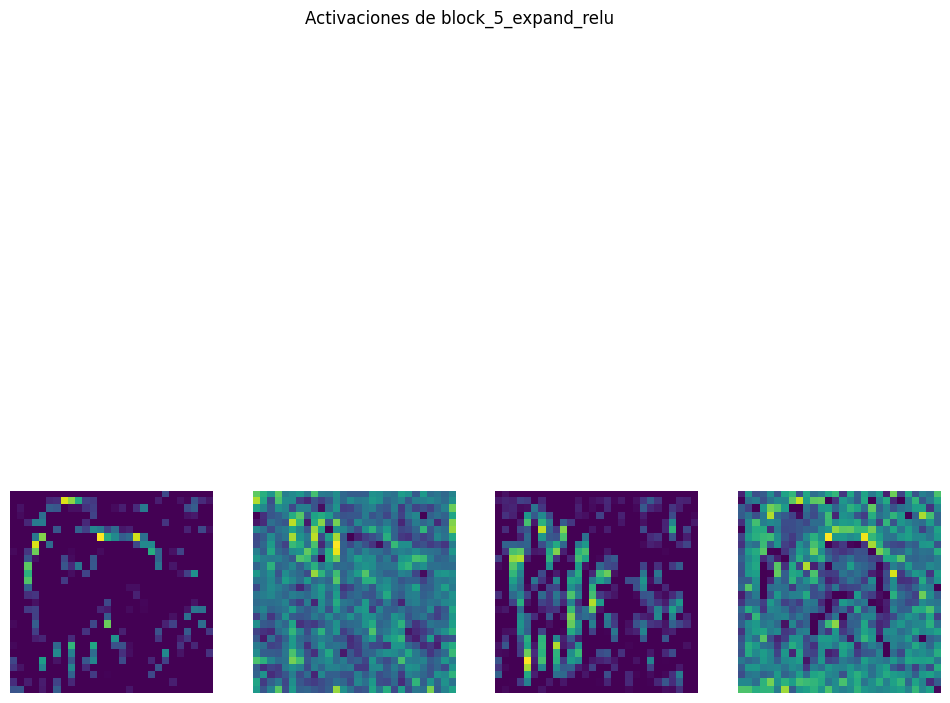

In [ ]:
layer_name = 'block_5_expand_relu'
intermediate_layer_model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)


# Obtener las activaciones
intermediate_output = intermediate_layer_model.predict(img_array)

# Visualizar las activaciones
plt.figure(figsize=(12, 12))
for i in range(min(4, intermediate_output.shape[-1])):
    plt.subplot(1, 4, i + 1)
    plt.imshow(intermediate_output[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle(f'Activaciones de {layer_name}')
plt.show()


### **Last Layer**

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


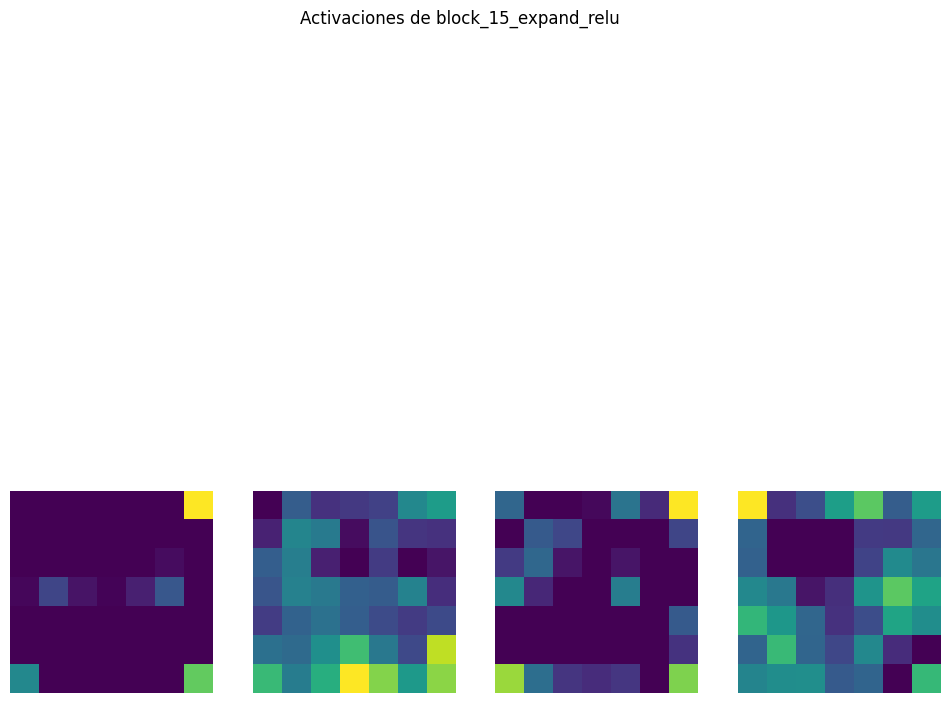

In [ ]:
layer_name = 'block_15_expand_relu'
intermediate_layer_model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)


# Obtener las activaciones
intermediate_output = intermediate_layer_model.predict(img_array)

# Visualizar las activaciones
plt.figure(figsize=(12, 12))
for i in range(min(4, intermediate_output.shape[-1])):
    plt.subplot(1, 4, i + 1)
    plt.imshow(intermediate_output[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle(f'Activaciones de {layer_name}')
plt.show()

# Predicción

In [ ]:
prediction = model.predict(img_array)
predicted_label_index = np.argmax(prediction, axis=1)[0]
predicted_label = breeds[predicted_label_index]

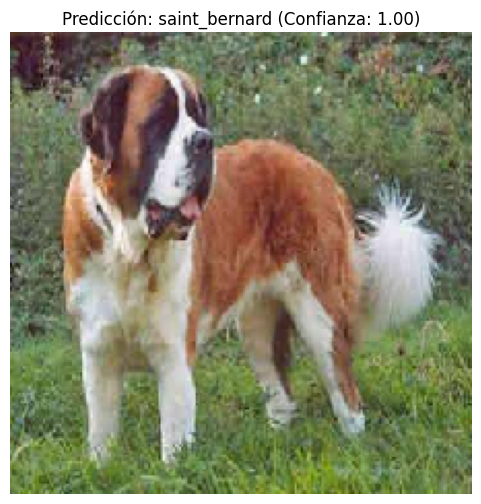

In [ ]:
# Cargar la imagen original para mostrarla
img = load_img(img_path, target_size=(224, 224))

# Mostrar la imagen original con la predicción
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Predicción: {predicted_label} (Confianza: {np.max(prediction[0]):.2f})')
plt.axis('off')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
golden_retriever: 0.00%
scottish_deerhound: 0.00%
doberman: 0.00%
malamute: 0.00%
chihuahua: 0.00%
pug: 0.00%
saint_bernard: 100.00%
beagle: 0.00%
french_bulldog: 0.00%
tibetan_mastiff: 0.00%


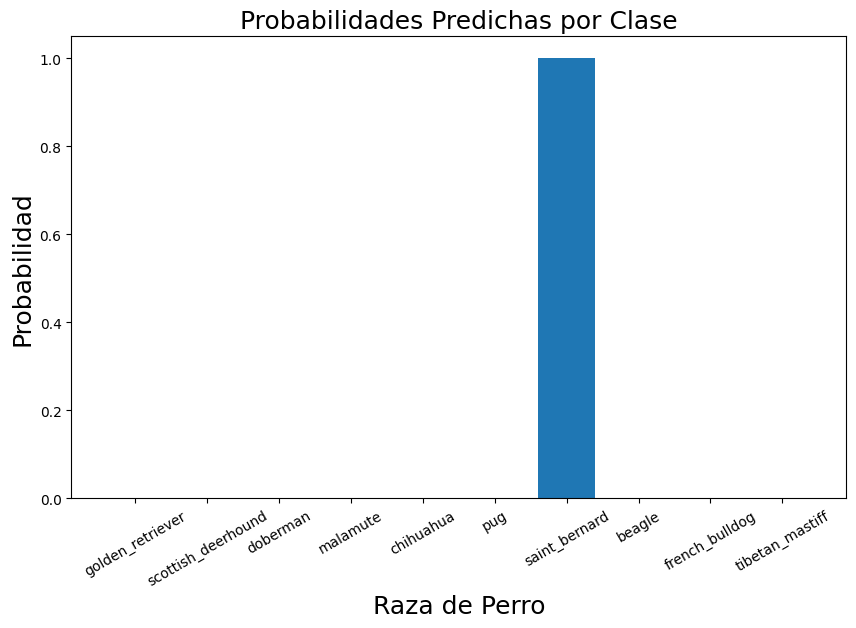

In [ ]:
prediction = model.predict(img_array)

# Mostrar las probabilidades para todas las razas
for i, breed in enumerate(breeds):
    print(f"{breed}: {prediction[0][i]*100:.2f}%")


plt.figure(figsize=(10, 6))
plt.bar(breeds, prediction[0])
plt.xlabel('Raza de Perro', fontsize=18)
plt.ylabel('Probabilidad', fontsize=18)
plt.title('Probabilidades Predichas por Clase', fontsize=18)
plt.xticks(rotation=30)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


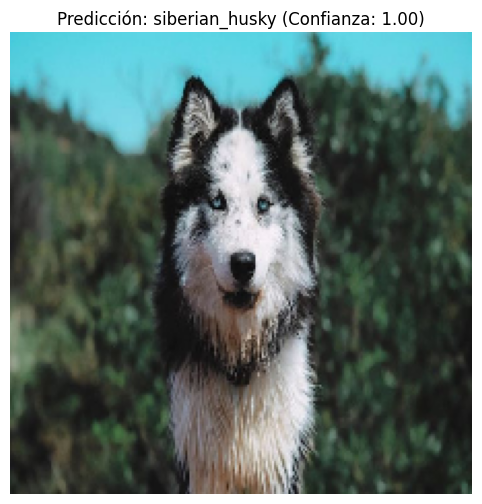

La raza de perro predicha es: siberian_husky
Tiempo de predicción: 0.4948 segundos


In [41]:
# Ahora, para predecir la raza de un perro a partir de una imagen:
# Definir la ruta de la imagen
image_path = '/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/Predecir/samusky.jpg'

# Cargar la imagen y redimensionarla al tamaño de entrada
img = load_img(image_path, target_size=(224, 224))

# Convertir la imagen a un array numpy
img_array = img_to_array(img)

# Expandir las dimensiones para que coincida con el shape esperado por el modelo
img_array = np.expand_dims(img_array, axis=0)

# Normalización
img_array = img_array / 255.0

# Medir el tiempo de predicción
start_time = time.time()  # Iniciar el temporizador
prediction = model.predict(img_array)
end_time = time.time()  # Finalizar el temporizador

# Calcular el tiempo de predicción
prediction_time = end_time - start_time


# Obtener la etiqueta predicha
predicted_label_index = np.argmax(prediction, axis=1)[0]  # Índice de la etiqueta predicha
predicted_breeds = {i: breed for i, breed in enumerate(breeds)}  # Diccionario de índices de clases

# Obtener la etiqueta de la raza de perro predicha usando el índice
predicted_label = predicted_breeds[predicted_label_index]


# Mostrar la imagen original con la predicción
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title(f'Predicción: {predicted_label} (Confianza: {np.max(prediction[0]):.2f})')
plt.axis('off')
plt.show()


print("La raza de perro predicha es:", predicted_label)
print(f"Tiempo de predicción: {prediction_time:.4f} segundos")



##Distribución de Confianza de Predicción

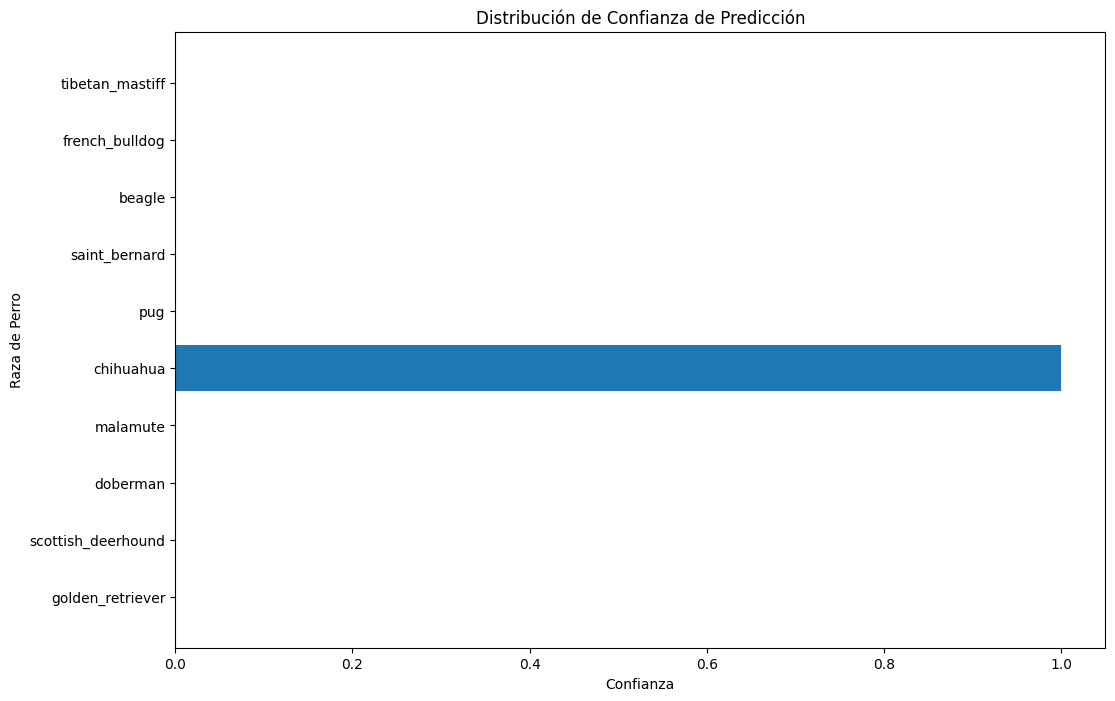

In [ ]:
import matplotlib.pyplot as plt


confidence_scores = prediction[0]  # Obtener las puntuaciones de confianza para todas las clases
breeds = breeds

plt.figure(figsize=(12, 8))
plt.barh(breeds, confidence_scores)
plt.xlabel('Confianza')
plt.ylabel('Raza de Perro')
plt.title('Distribución de Confianza de Predicción')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


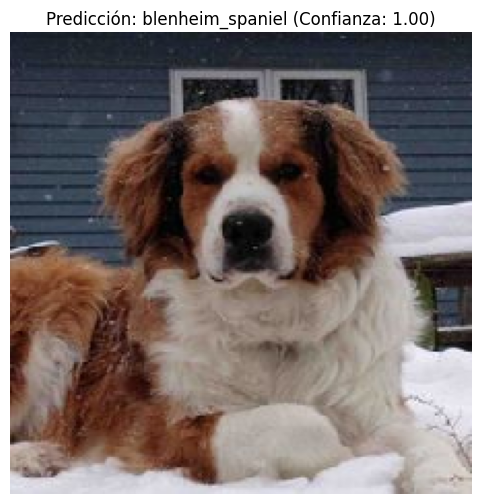

La raza de perro predicha es: blenheim_spaniel
Tiempo de predicción: 0.1229 segundos


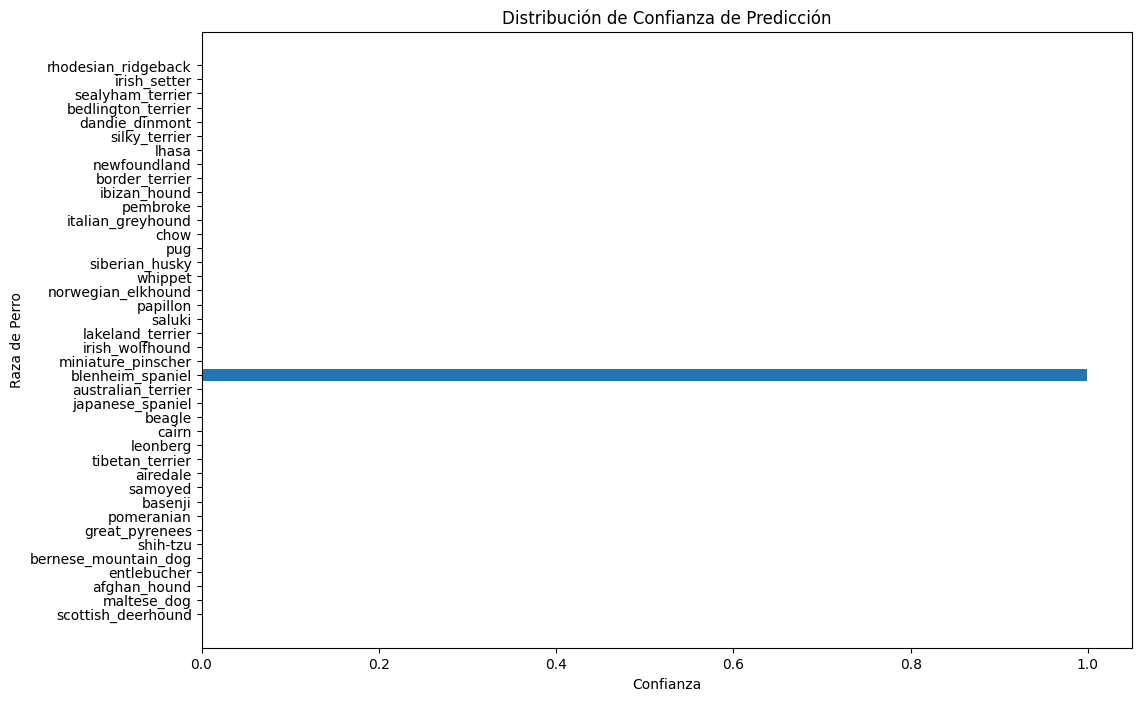

In [44]:
# Ahora, para predecir la raza de un perro a partir de una imagen:
# Definir la ruta de la imagen
image_path = '/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/Predecir/gb.jpg'

# Cargar la imagen y redimensionarla al tamaño de entrada
img = load_img(image_path, target_size=(224, 224))

# Convertir la imagen a un array numpy
img_array = img_to_array(img)

# Expandir las dimensiones para que coincida con el shape esperado por el modelo
img_array = np.expand_dims(img_array, axis=0)

# Normalización
img_array = img_array / 255.0

# Medir el tiempo de predicción
start_time = time.time()  # Iniciar el temporizador
prediction = model.predict(img_array)  # Usar el modelo final entrenado
end_time = time.time()  # Finalizar el temporizador

# Calcular el tiempo de predicción
prediction_time = end_time - start_time

# Obtener la etiqueta predicha considerando las razas acumuladas
predicted_label_index = np.argmax(prediction, axis=1)[0]  # Índice de la etiqueta predicha
predicted_label = breeds[predicted_label_index]  # Usar las razas acumuladas hasta la última fase

# Mostrar la imagen original con la predicción
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title(f'Predicción: {predicted_label} (Confianza: {np.max(prediction[0]):.2f})')
plt.axis('off')
plt.show()

print("La raza de perro predicha es:", predicted_label)
print(f"Tiempo de predicción: {prediction_time:.4f} segundos")

# Mostrar las puntuaciones de confianza para todas las razas acumuladas
confidence_scores = prediction[0]  # Obtener las puntuaciones de confianza para todas las clases

plt.figure(figsize=(12, 8))
plt.barh(breeds, confidence_scores)  # Usar `all_breeds` para las etiquetas
plt.xlabel('Confianza')
plt.ylabel('Raza de Perro')
plt.title('Distribución de Confianza de Predicción')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


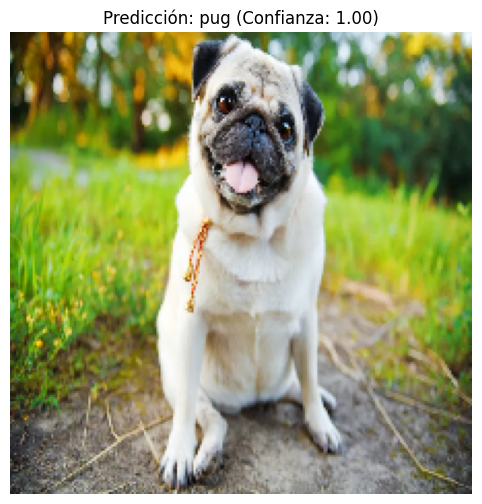

La raza de perro predicha es: pug
Tiempo de predicción: 0.2563 segundos


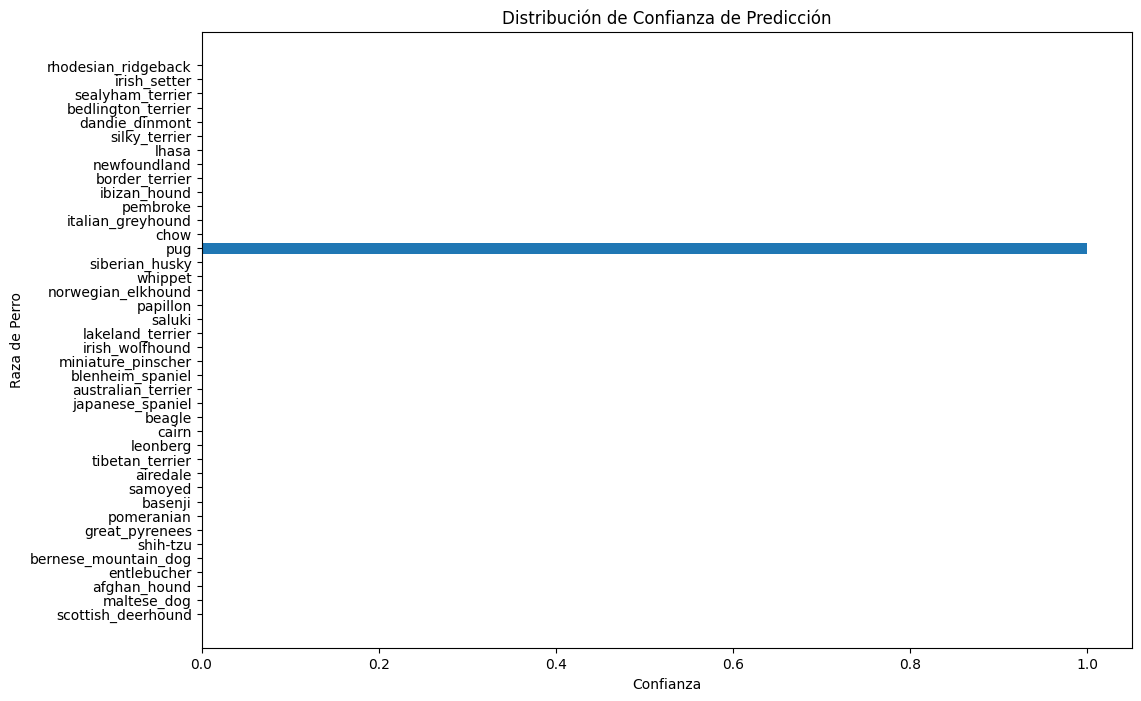

In [47]:
# Ahora, para predecir la raza de un perro a partir de una imagen:
# Definir la ruta de la imagen
image_path = '/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/Predecir/pug.jpg'

# Cargar la imagen y redimensionarla al tamaño de entrada
img = load_img(image_path, target_size=(224, 224))

# Convertir la imagen a un array numpy
img_array = img_to_array(img)

# Expandir las dimensiones para que coincida con el shape esperado por el modelo
img_array = np.expand_dims(img_array, axis=0)

# Normalización
img_array = img_array / 255.0

# Medir el tiempo de predicción
start_time = time.time()  # Iniciar el temporizador
prediction = model.predict(img_array)  # Usar el modelo final entrenado
end_time = time.time()  # Finalizar el temporizador

# Calcular el tiempo de predicción
prediction_time = end_time - start_time

# Obtener la etiqueta predicha considerando las razas acumuladas
predicted_label_index = np.argmax(prediction, axis=1)[0]  # Índice de la etiqueta predicha
predicted_label = breeds[predicted_label_index]  # Usar las razas acumuladas hasta la última fase

# Mostrar la imagen original con la predicción
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title(f'Predicción: {predicted_label} (Confianza: {np.max(prediction[0]):.2f})')
plt.axis('off')
plt.show()

print("La raza de perro predicha es:", predicted_label)
print(f"Tiempo de predicción: {prediction_time:.4f} segundos")

# Mostrar las puntuaciones de confianza para todas las razas acumuladas
confidence_scores = prediction[0]  # Obtener las puntuaciones de confianza para todas las clases

plt.figure(figsize=(12, 8))
plt.barh(breeds, confidence_scores)  # Usar `all_breeds` para las etiquetas
plt.xlabel('Confianza')
plt.ylabel('Raza de Perro')
plt.title('Distribución de Confianza de Predicción')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


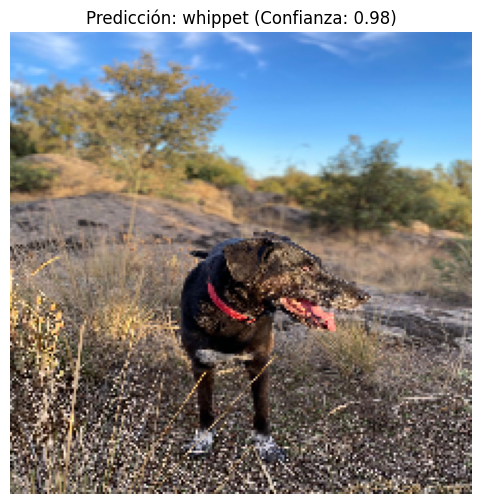

La raza de perro predicha es: whippet
Tiempo de predicción: 0.1848 segundos


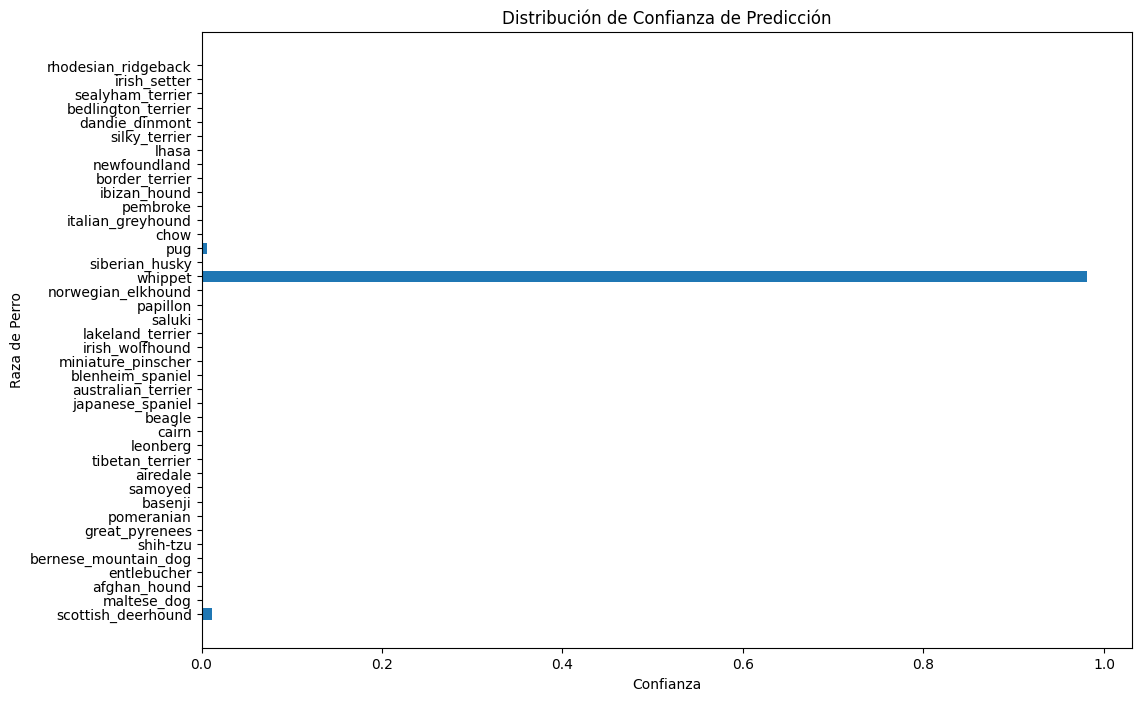

In [48]:
# Ahora, para predecir la raza de un perro a partir de una imagen:
# Definir la ruta de la imagen
image_path = '/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/Predecir/pompa.jpg'

# Cargar la imagen y redimensionarla al tamaño de entrada
img = load_img(image_path, target_size=(224, 224))

# Convertir la imagen a un array numpy
img_array = img_to_array(img)

# Expandir las dimensiones para que coincida con el shape esperado por el modelo
img_array = np.expand_dims(img_array, axis=0)

# Normalización
img_array = img_array / 255.0

# Medir el tiempo de predicción
start_time = time.time()  # Iniciar el temporizador
prediction = model.predict(img_array)  # Usar el modelo final entrenado
end_time = time.time()  # Finalizar el temporizador

# Calcular el tiempo de predicción
prediction_time = end_time - start_time

# Obtener la etiqueta predicha considerando las razas acumuladas
predicted_label_index = np.argmax(prediction, axis=1)[0]  # Índice de la etiqueta predicha
predicted_label = breeds[predicted_label_index]  # Usar las razas acumuladas hasta la última fase

# Mostrar la imagen original con la predicción
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title(f'Predicción: {predicted_label} (Confianza: {np.max(prediction[0]):.2f})')
plt.axis('off')
plt.show()

print("La raza de perro predicha es:", predicted_label)
print(f"Tiempo de predicción: {prediction_time:.4f} segundos")

# Mostrar las puntuaciones de confianza para todas las razas acumuladas
confidence_scores = prediction[0]  # Obtener las puntuaciones de confianza para todas las clases

plt.figure(figsize=(12, 8))
plt.barh(breeds, confidence_scores)  # Usar `all_breeds` para las etiquetas
plt.xlabel('Confianza')
plt.ylabel('Raza de Perro')
plt.title('Distribución de Confianza de Predicción')
plt.show()


# **FIN: Simple model**

# **Curriculum Learning**

#### Ruta y Lectura de datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2, ResNet50, ResNet101, ResNet152, VGG16, InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import keras
import itertools
import time

In [ ]:
train_labels = pd.read_csv('/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/labels.csv')

In [ ]:
# Agregar extensión ".jpg" a las IDs de las imágenes
train_labels['id'] = train_labels['id'].apply(lambda x: x + ".jpg")

In [ ]:
# Rutas de los directorios de entrenamiento y prueba
train_path = '/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/train'
test_path = '/content/drive/MyDrive/Tfg23JLdog/Data/dog-breed-identification/test'

#### Carga y procesado de imágenes

In [ ]:
# Función para cargar y preprocesar imágenes
def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    for path in image_paths:
        # Cargar la imagen y redimensionarla al tamaño objetivo
        image = load_img(path, target_size=target_size)
        # Convertir la imagen a un array numpy y normalizar los valores de píxeles
        image = img_to_array(image) / 255.0
        images.append(image)
    return np.array(images)

#### Declaración de razas que se van a ir añadiendo

##### 40 razas en 10 fases añadiendo 4 por fase

In [ ]:
#Fase inicial: Razas populares, visualmente distintas y de características generales bien conocidas.
#Intermedias: Razas menos conocidas pero aún con diferencias marcadas.
#Fase avanzada: Razas que podrían confundirse entre sí, ya sea por similitudes físicas o menor popularidad.
fase_breeds_1 = ['golden_retriever', 'beagle', 'chihuahua', 'boxer']  # Razas muy populares y fáciles de identificar
fase_breeds_2 = ['doberman', 'malamute', 'saint_bernard', 'pug']  # Razas grandes y medianas con características distintas
fase_breeds_3 = ['french_bulldog', 'tibetan_mastiff', 'dingo', 'pekinese']  # Menos comunes, características físicas variadas
fase_breeds_4 = ['bluetick', 'basenji', 'shetland_sheepdog', 'maltese_dog']  # Razas medianas y pequeñas con apariencia mixta
fase_breeds_5 = ['scottish_deerhound', 'borzoi', 'walker_hound', 'african_hunting_dog']  # Razas de caza y trabajo con similitudes físicas
fase_breeds_6 = ['norfolk_terrier', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier']  # Terriers con apariencias ligeramente similares
fase_breeds_7 = ['standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn']  # Razas de trabajo con diferentes pelajes
fase_breeds_8 = ['affenpinscher', 'boston_bull', 'groenendael', 'bedlington_terrier']  # Razas variadas, menos populares y diferenciadas
fase_breeds_9 = ['ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer']  # Razas de caza y de gran tamaño
fase_breeds_10 = ['shetland_sheepdog', 'irish_setter', 'bedlington_terrier', 'tibetan_mastiff']  # Razas avanzadas con características únicas


In [ ]:
breeds = fase_breeds_1 + fase_breeds_2 + fase_breeds_3 + fase_breeds_4 + fase_breeds_5 + fase_breeds_6 + fase_breeds_7 + fase_breeds_8 + fase_breeds_9 + fase_breeds_10

##### 40 razas en 4 fases añadiendo 10 por fase

In [ ]:
fase_breeds_1 = ['beagle', 'pomeranian', 'samoyed', 'shih-tzu', 'pug', 'chow', 'great_pyrenees', 'bernese_mountain_dog', 'maltese_dog', 'cairn']
# Razas populares, fáciles de distinguir y mayormente comunes en tamaño y características

fase_breeds_2 = ['australian_terrier', 'blenheim_spaniel', 'miniature_pinscher', 'papillon', 'pembroke', 'basenji', 'tibetan_terrier', 'leonberg', 'border_terrier', 'whippet']
# Razas menos conocidas pero con características variadas y distintivas

fase_breeds_3 = ['scottish_deerhound', 'afghan_hound', 'entlebucher', 'airedale', 'lakeland_terrier', 'norwegian_elkhound', 'siberian_husky', 'italian_greyhound', 'irish_setter', 'ibizan_hound']
# Razas de caza y trabajo con similitudes en tamaño o pelaje

fase_breeds_4 = ['newfoundland', 'lhasa', 'silky_terrier', 'dandie_dinmont', 'bedlington_terrier', 'sealyham_terrier', 'irish_wolfhound', 'irish_setter', 'japanese_spaniel', 'rhodesian_ridgeback']
# Razas avanzadas con características únicas y menos populares


In [ ]:
breeds = fase_breeds_1 + fase_breeds_2 + fase_breeds_3 + fase_breeds_4

##### Eliminar razas que no se encuentren en el conjunto

In [ ]:
# Eliminar razas que no están en la lista de razas definidas
train_labels = train_labels[train_labels['breed'].isin(breeds)]

##### Conteo y gráfico de la distribución de las razas

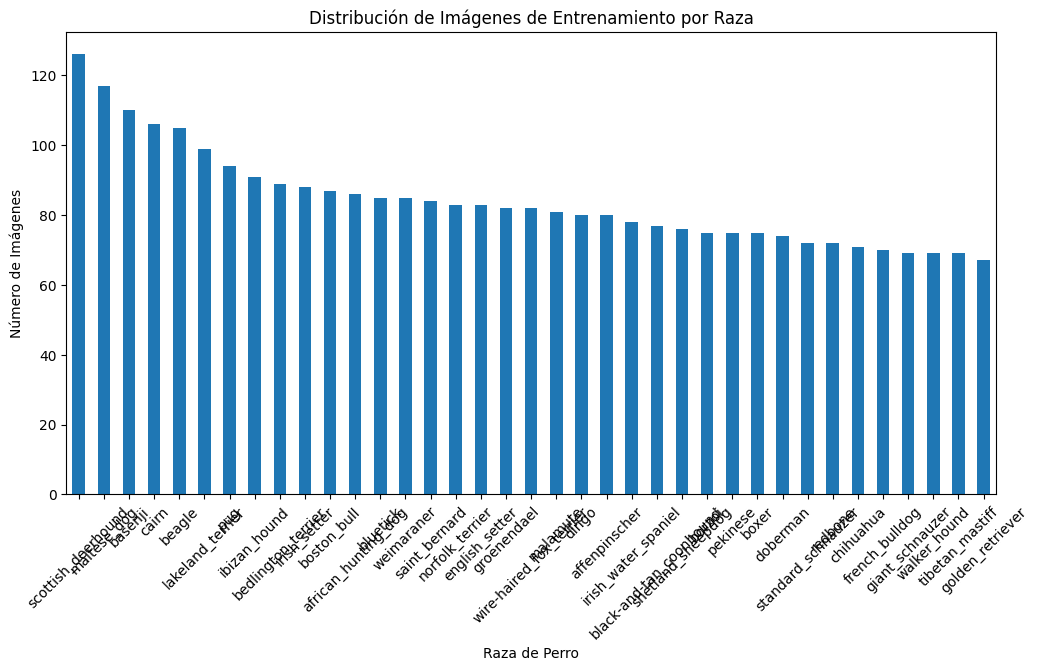

In [ ]:
# Contar la cantidad de imágenes por raza
breed_counts = train_labels['breed'].value_counts()

# Graficar la distribución de las imágenes por raza
plt.figure(figsize=(12, 6))
breed_counts.plot(kind='bar')
plt.xlabel('Raza de Perro')
plt.ylabel('Número de Imágenes')
plt.title('Distribución de Imágenes de Entrenamiento por Raza')
plt.xticks(rotation=45)
plt.show()

#### Entrenamiento

##### Entrenamiento con 4 fases

In [ ]:

all_breeds = []  # Lista para acumular las razas de cada fase

for i, breeds in enumerate([fase_breeds_1, fase_breeds_2, fase_breeds_3, fase_breeds_4], start=1):
    # Voy acumulando las razas actuales en all_breeds
    all_breeds.extend(breeds)

    print(f"\nEntrenando en la fase {i} con razas acumuladas: {all_breeds}")

    # Filtro las etiquetas con todas las razas acumuladas hasta la fase actual
    phase_labels = train_labels[train_labels['breed'].isin(all_breeds)]
    phase_image_paths = [os.path.join(train_path, filename) for filename in phase_labels['id']]

    # Cargar y procesar imágenes del conjunto acumulado
    phase_images = load_and_preprocess_images(phase_image_paths)

    # Divido datos en entrenamiento y validación (80% entrenamiento, 20% validación)
    val_split_index = int(len(phase_images) * 0.8)
    train_images, val_images = phase_images[:val_split_index], phase_images[val_split_index:]
    train_labels_encoded = keras.utils.to_categorical(
        phase_labels['breed'].map({breed: i for i, breed in enumerate(all_breeds)}))[:val_split_index]
    val_labels_encoded = keras.utils.to_categorical(
        phase_labels['breed'].map({breed: i for i, breed in enumerate(all_breeds)}))[val_split_index:]

    # Defino el modelo, en este caso MobileNetv2, para ajustar la capa de salida según el número actual de razas
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    # Aquí se agregan las capas adicionales con el número de clases actual
    x = keras.layers.Flatten()(base_model.output)
    x = keras.layers.Dropout(0.4)(x)
    predictor = keras.layers.Dense(len(all_breeds), activation='softmax')(x)

    # Se crea el modelo completo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Por último, se entrena el modelo en el conjunto acumulado
    history = model.fit(
        train_images, train_labels_encoded,
        validation_data=(val_images, val_labels_encoded),
        epochs=10, batch_size=128
    )



Entrenando en la fase 1 con razas acumuladas: ['beagle', 'pomeranian', 'samoyed', 'shih-tzu', 'pug', 'chow', 'great_pyrenees', 'bernese_mountain_dog', 'maltese_dog', 'cairn']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.4808 - loss: 2.0133 - val_accuracy: 0.8977 - val_loss: 0.3823
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.9803 - loss: 0.0650 - val_accuracy: 0.9070 - val_loss: 0.4038
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9931 - loss: 0.0167 - val_accuracy: 0.8977 - val_loss: 0.4078
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.9985 - loss: 0.0044 - val_accuracy: 0.9023 - val_loss: 0.4350
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 1.0000 - loss: 3.8833e-04 - val_accuracy: 0.9070 - val_loss: 0.4701
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.9983 - loss: 0.0024 - val_accuracy: 0.9070 - val_loss: 0.4894
Epoch 7/10
7/7 ━━

##### Entrenamiento con 10 fases

In [ ]:
# Entrenamiento por etapas de dificultad con validación acumulada
all_breeds = []  # Lista para acumular las razas de cada fase

for i, breeds in enumerate([fase_breeds_1, fase_breeds_2, fase_breeds_3, fase_breeds_4, fase_breeds_5, fase_breeds_6, fase_breeds_7, fase_breeds_8, fase_breeds_9, fase_breeds_10], start=1):
    # Acumular las razas actuales en `all_breeds`
    all_breeds.extend(breeds)

    print(f"\nEntrenando en la fase {i} con razas acumuladas: {all_breeds}")

    # Filtrar etiquetas con todas las razas acumuladas hasta la fase actual
    phase_labels = train_labels[train_labels['breed'].isin(all_breeds)]
    phase_image_paths = [os.path.join(train_path, filename) for filename in phase_labels['id']]

    # Cargar y procesar imágenes del conjunto acumulado
    phase_images = load_and_preprocess_images(phase_image_paths)

    # Dividir datos en entrenamiento y validación (80% entrenamiento, 20% validación)
    val_split_index = int(len(phase_images) * 0.8)
    train_images, val_images = phase_images[:val_split_index], phase_images[val_split_index:]
    train_labels_encoded = keras.utils.to_categorical(
        phase_labels['breed'].map({breed: i for i, breed in enumerate(all_breeds)}))[:val_split_index]
    val_labels_encoded = keras.utils.to_categorical(
        phase_labels['breed'].map({breed: i for i, breed in enumerate(all_breeds)}))[val_split_index:]

    # Redefinir el modelo para ajustar la capa de salida según el número actual de razas
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    # Agregar capas adicionales con el número de clases actual
    x = keras.layers.Flatten()(base_model.output)
    x = keras.layers.Dropout(0.4)(x)
    predictor = keras.layers.Dense(len(all_breeds), activation='softmax')(x)

    # Crear el modelo completo y compilarlo
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo en el conjunto acumulado
    history = model.fit(
        train_images, train_labels_encoded,
        validation_data=(val_images, val_labels_encoded),
        epochs=15, batch_size=128
    )



Entrenando en la fase 1 con razas acumuladas: ['golden_retriever', 'beagle', 'chihuahua', 'boxer']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 20s/step - accuracy: 0.3458 - loss: 2.4647 - val_accuracy: 0.8594 - val_loss: 0.2914
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.9241 - loss: 0.3711 - val_accuracy: 0.8750 - val_loss: 0.6120
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.9477 - loss: 0.2292 - val_accuracy: 0.9062 - val_loss: 0.2315
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.9948 - loss: 0.0231 - val_accuracy: 0.9844 - val_loss: 0.0716
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.9844 - val_loss: 0.0496
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.9948 - loss: 0.0185 - val_accuracy: 0.9844 - val_loss: 0.0419
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 1.0000 - loss: 1.3662e-04 - val_ac

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Variables para almacenar la historia de precisión y pérdida de todas las fases
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

all_breeds = []  # Lista para acumular las razas de cada fase

for i, breeds in enumerate([fase_breeds_1, fase_breeds_2, fase_breeds_3, fase_breeds_4, fase_breeds_5, fase_breeds_6, fase_breeds_7, fase_breeds_8, fase_breeds_9, fase_breeds_10], start=1):
    # Acumular las razas actuales en `all_breeds`
    all_breeds.extend(breeds)
    print(f"\nEntrenando en la fase {i} con razas acumuladas: {all_breeds}")

    # Filtrar etiquetas con todas las razas acumuladas hasta la fase actual
    phase_labels = train_labels[train_labels['breed'].isin(all_breeds)]
    phase_image_paths = [os.path.join(train_path, filename) for filename in phase_labels['id']]
    phase_images = load_and_preprocess_images(phase_image_paths)

    # Dividir datos en entrenamiento y validación (80% entrenamiento, 20% validación)
    val_split_index = int(len(phase_images) * 0.8)
    train_images, val_images = phase_images[:val_split_index], phase_images[val_split_index:]
    train_labels_encoded = keras.utils.to_categorical(
        phase_labels['breed'].map({breed: i for i, breed in enumerate(all_breeds)}))[:val_split_index]
    val_labels_encoded = keras.utils.to_categorical(
        phase_labels['breed'].map({breed: i for i, breed in enumerate(all_breeds)}))[val_split_index:]

    # Definir modelo con MobileNetV2
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    x = keras.layers.Flatten()(base_model.output)
    x = keras.layers.Dropout(0.4)(x)
    predictor = keras.layers.Dense(len(all_breeds), activation='softmax')(x)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictor)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0004)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(
        train_images, train_labels_encoded,
        validation_data=(val_images, val_labels_encoded),
        epochs=15, batch_size=128
    )

    # Almacenar métricas de precisión y pérdida
    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])

    # Matriz de confusión
    val_predictions = model.predict(val_images)
    val_pred_classes = np.argmax(val_predictions, axis=1)
    val_true_classes = np.argmax(val_labels_encoded, axis=1)

    cm = confusion_matrix(val_true_classes, val_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=all_breeds, yticklabels=all_breeds)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for Phase {i}")
    plt.show()

    # Curvas ROC y AUC
    val_true_binarized = label_binarize(val_true_classes, classes=range(len(all_breeds)))
    plt.figure()
    for j in range(len(all_breeds)):
        fpr, tpr, _ = roc_curve(val_true_binarized[:, j], val_predictions[:, j])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{all_breeds[j]} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves for Phase {i}")
    plt.legend()
    plt.show()

# Gráficas finales de precisión y pérdida de entrenamiento y validación por fase
plt.figure()
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Phase')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Phase')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Phase')
plt.ylabel('Loss')
plt.title('Training and Validation Loss by Phase')
plt.legend()
plt.show()
